# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Israel Santos Vieira, Mateus de Oliveira Peternelli

**Matricula**: 201820268, 201820283

**Turma**: 10A

Link do repositório GitHub: https://github.com/IsraelSantosV/Complexidade-e-Projetos-de-Algoritmos/tree/main

# Importações e Variáveis globais

In [33]:
import numpy as np
import time
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(50000)
tamanho_analise = 200

# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [34]:
def insertionSort(arranjo):
  tempo_inicial = time.time()
  comparacoes = 1
  for j in range (1, len(arranjo)):
    comparacoes += 1
    chave = arranjo[j]
    i = j-1
    
    while i >=0 and arranjo[i] > chave:
      comparacoes += 1
      arranjo[i+1] = arranjo[i]
      i = i-1
    arranjo[i+1] = chave

  tempo_execucao = time.time() - tempo_inicial
  return arranjo, tempo_execucao, comparacoes

##  Merge Sort


In [35]:
def mergeSort(arranjo):
  tempo_inicial = time.time()
  comparacoes = 1
  if len(arranjo) > 1:
        meio = len(arranjo) // 2
        esquerda = arranjo[:meio]
        direita = arranjo[meio:]

        mergeSort(esquerda)
        mergeSort(direita)

        i = 0
        j = 0
        k = 0
        
        comparacoes += 1
        while i < len(esquerda) and j < len(direita):
            if esquerda[i] <= direita[j]:
              arranjo[k] = esquerda[i]
              i += 1
            else:
              arranjo[k] = direita[j]
              j += 1

            k += 1
            comparacoes += 1

        while i < len(esquerda):
          comparacoes += 1
          arranjo[k] = esquerda[i]
          i += 1
          k += 1

        while j < len(direita):
          comparacoes += 1
          arranjo[k] = direita[j]
          j += 1
          k += 1
  
  tempo_execucao = time.time() - tempo_inicial
  return arranjo, tempo_execucao, comparacoes

##  Selection Sort


In [36]:
def selectionSort(arranjo):
  tempo_inicial = time.time()
  comparacoes = 1
  for step in range(len(arranjo)):
        min_idx = step

        comparacoes += 1
        for i in range(step + 1, len(arranjo)):
            if arranjo[i] < arranjo[min_idx]:
              comparacoes += 1
              min_idx = i
         
        (arranjo[step], arranjo[min_idx]) = (arranjo[min_idx], arranjo[step])
  
  tempo_execucao = time.time() - tempo_inicial
  return arranjo, tempo_execucao, comparacoes

##  Bubble Sort


In [37]:
def bubbleSort(arranjo):
  tempo_inicial = time.time()
  comparacoes = 1

  alterado = True
  for i in range(len(arranjo)-1):
    if alterado:
      comparacoes += 1
      alterado = False
      for j in range(len(arranjo - i)-1):
        comparacoes += 1
        if arranjo[j] > arranjo[j+1]:
          comparacoes += 1
          temp = arranjo[j+1]
          arranjo[j+1] = arranjo[j]
          arranjo[j] = temp
          alterado = True

  tempo_execucao = time.time() - tempo_inicial
  return arranjo, tempo_execucao, comparacoes

## Heap Sort

In [38]:
def heapify(arranjo, n, i):
  largest = i
  l = 2 * i + 1
  r = 2 * i + 2
    
  if l < n and arranjo[i] < arranjo[l]:
    largest = l 

  if r < n and arranjo[largest] < arranjo[r]:
    largest = r 
    
  if largest != i: 
    arranjo[i],arranjo[largest] = arranjo[largest],arranjo[i]
    heapify(arranjo, n, largest)

def heapSort(arranjo):
  tempo_inicial = time.time()
  comparacoes = 1
  n = len(arranjo)
  
  for i in range(n // 2 - 1, -1, -1):
    heapify(arranjo, n, i)
    comparacoes += 3
    
  for i in range(n-1, 0, -1): 
    arranjo[i], arranjo[0] = arranjo[0], arranjo[i]
    heapify(arranjo, i, 0)
    comparacoes += 3
  
  tempo_execucao = time.time() - tempo_inicial
  return arranjo, tempo_execucao, comparacoes

## Quick Sort

> pivo = *A[A-comprimento]*

In [39]:
def partition(arranjo, inicio, fim, comparacoes):
  pivo = arranjo[fim]
  i = inicio - 1
  for j in range(inicio, fim - 1):
    if arranjo[j] <= pivo:
      comparacoes += 1
      i = i + 1
      arranjo[i], arranjo[j] = arranjo[j], arranjo[i]
  
  arranjo[i+1], arranjo[fim] = arranjo[fim], arranjo[i+1]
  return (i + 1), comparacoes

def quickSort(arranjo, inicio, fim, comparacoes):
  if inicio < fim:
    comparacoes += 1
    meio, comparacoes = partition(arranjo, inicio, fim, comparacoes)
    quickSort(arranjo,inicio,meio-1, comparacoes)
    quickSort(arranjo,meio+1,fim, comparacoes)

  return arranjo, comparacoes

def quickSortTotal(arranjo):
  tempo_inicial = time.time()
  comparacoes = 1

  arranjo, comparacoes = quickSort(arranjo, 0, len(arranjo)-1, comparacoes)
  tempo_execucao = time.time() - tempo_inicial
  return arranjo, tempo_execucao, comparacoes

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





## Funções auxiliares

In [40]:
# Analise Assintótica
def executarAnalise(qtd_vezes, algoritmo, metodoGerarArranjo):
  analise_tempo = []
  analise_comparacoes = []

  for i in range(qtd_vezes):
    arranjo = metodoGerarArranjo(i)
    arranjo_ordenado, tempo_execucao, comparacoes = algoritmo(arranjo)
    analise_tempo.append(tempo_execucao)
    analise_comparacoes.append(comparacoes)

  return analise_tempo, analise_comparacoes

In [41]:
# Obter o gráfico e a quantidade de comparações da análise
def resultadoAnalise(algoritmo, arranjoPiorCaso, arranjoMelhorCaso, arranjoCasoAleatorio, titulo):
  p_tempo, p_comparacoes = executarAnalise(tamanho_analise, algoritmo, arranjoPiorCaso)
  m_tempo, m_comparacoes = executarAnalise(tamanho_analise, algoritmo, arranjoMelhorCaso)
  a_tempo, a_comparacoes = executarAnalise(tamanho_analise, algoritmo, arranjoCasoAleatorio)

  # Plotagem do gráfico
  plt.rcParams["figure.figsize"] = [7.50, 3.50]
  plt.rcParams["figure.autolayout"] = True
  line1 = plt.plot(p_tempo, linewidth=2.0, label="Pior caso")
  line2 = plt.plot(m_tempo, linewidth=2.0, label="Melhor caso")
  line3 = plt.plot(a_tempo, linewidth=2.0, label="Caso aleatório")
  plt.title(f'Análise Assintótica - {titulo}')
  plt.ylabel('Tempo de execução')
  plt.xlabel('Quantidade de análises')
  leg = plt.legend(loc='upper left')
  plt.show()

  return (int)(np.mean(p_comparacoes)), (int)(np.mean(m_comparacoes)), (int)(np.mean(a_comparacoes))

In [42]:
def obterArranjoPiorTempo(tamanho):
  arranjo = np.arange(tamanho)
  return arranjo[::-1]

In [43]:
def obterArranjoMelhorTempo(tamanho):
  return np.arange(tamanho)

In [44]:
def obterArranjoAleatorio(tamanho):
  return np.random.randint(0, 100, (tamanho))

## Questão 1 - Letra A e B

### Insertion Sort - Análise

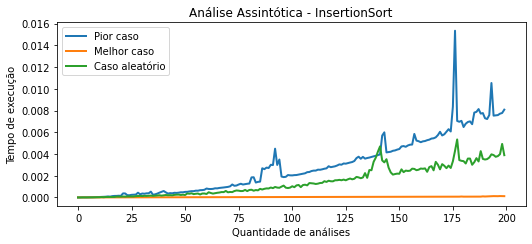

[Comparações - Média]: Pior(6666) Melhor(99) Aleatório(3368)


In [45]:
# Melhor caso: vetor já ordenado
melhorCaso = obterArranjoMelhorTempo
# Pior caso: vetor em ordem decrescente
piorCaso = obterArranjoPiorTempo

# Plotagem
p_comp, m_comp, a_comp = resultadoAnalise(insertionSort, piorCaso, melhorCaso, obterArranjoAleatorio, "InsertionSort")
print(f"[Comparações - Média]: Pior({p_comp}) Melhor({m_comp}) Aleatório({a_comp})")

### Merge Sort - Análise

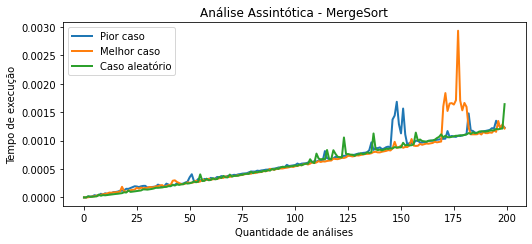

[Comparações - Média]: Pior(101) Melhor(101) Aleatório(101)


In [46]:
# Melhor caso: vetor já ordenado
melhorCaso = obterArranjoMelhorTempo
# Pior caso: vetor em ordem decrescente
piorCaso = obterArranjoPiorTempo

# Plotagem
p_comp, m_comp, a_comp = resultadoAnalise(mergeSort, piorCaso, melhorCaso, obterArranjoAleatorio, "MergeSort")
print(f"[Comparações - Média]: Pior({p_comp}) Melhor({m_comp}) Aleatório({a_comp})")

### Selection Sort - Análise

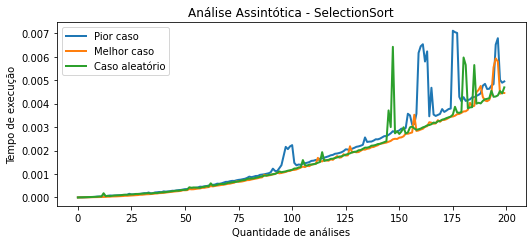

[Comparações - Média]: Pior(3408) Melhor(100) Aleatório(410)


In [47]:
# Melhor caso: vetor já ordenado
melhorCaso = obterArranjoMelhorTempo
# Pior caso: vetor em ordem decrescente
piorCaso = obterArranjoPiorTempo

# Plotagem
p_comp, m_comp, a_comp = resultadoAnalise(selectionSort, piorCaso, melhorCaso, obterArranjoAleatorio, "SelectionSort")
print(f"[Comparações - Média]: Pior({p_comp}) Melhor({m_comp}) Aleatório({a_comp})")

### Bubble Sort - Análise

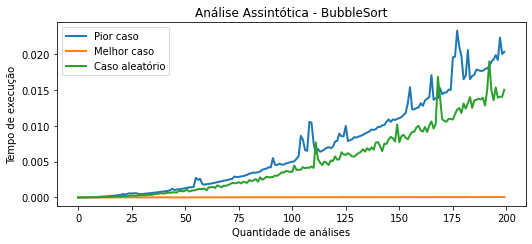

[Comparações - Média]: Pior(19702) Melhor(100) Aleatório(15169)


In [48]:
# Melhor caso: vetor já ordenado
melhorCaso = obterArranjoMelhorTempo
# Pior caso: vetor em ordem decrescente
piorCaso = obterArranjoPiorTempo

# Plotagem
p_comp, m_comp, a_comp = resultadoAnalise(bubbleSort, piorCaso, melhorCaso, obterArranjoAleatorio, "BubbleSort")
print(f"[Comparações - Média]: Pior({p_comp}) Melhor({m_comp}) Aleatório({a_comp})")

### Heap Sort - Análise

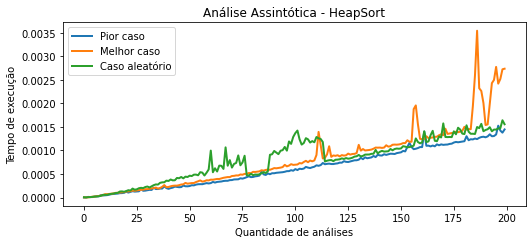

[Comparações - Média]: Pior(445) Melhor(445) Aleatório(445)


In [49]:
# Melhor caso: vetor já ordenado
melhorCaso = obterArranjoMelhorTempo
# Pior caso: vetor em ordem decrescente
piorCaso = obterArranjoPiorTempo

# Plotagem
p_comp, m_comp, a_comp = resultadoAnalise(heapSort, piorCaso, melhorCaso, obterArranjoAleatorio, "HeapSort")
print(f"[Comparações - Média]: Pior({p_comp}) Melhor({m_comp}) Aleatório({a_comp})")

### Quick Sort - Análise

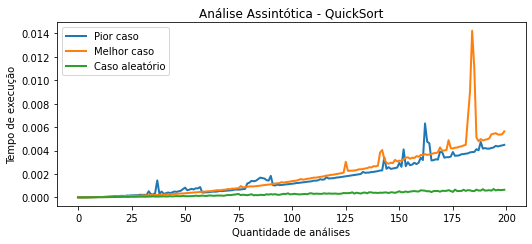

[Comparações - Média]: Pior(1) Melhor(99) Aleatório(53)


In [50]:
# Melhor caso: vetor já ordenado
melhorCaso = obterArranjoMelhorTempo
# Pior caso: vetor em ordem decrescente
piorCaso = obterArranjoPiorTempo

# Plotagem
p_comp, m_comp, a_comp = resultadoAnalise(quickSortTotal, piorCaso, melhorCaso, obterArranjoAleatorio, "QuickSort")
print(f"[Comparações - Média]: Pior({p_comp}) Melhor({m_comp}) Aleatório({a_comp})")

## Questão 1 - Letra C

Tanto no Merge Sort, Quick Sort e Heap Sort a complexidade será de O(n log n) no pior caso e O(n log n) no seu melhor caso, pois cada vez que os códigos fazem uma ordenação é necessário que o arranjo seja dividido ao meio. E possivel observar tambem que o tempo de execução das 3 ordenaçoes variam principalmente entre a Heap Sort e as outras duas, onde a Heap tem uma maior media de tempo para executar do que as outras.

Insertion Sort e o bubble sort é O(n²) no seu pior caso e Ω(n²) no seu melhor caso pois em seu segundo loop o arranjo ira ser percorrido 2 vezes, ou seja, se n equivale ao tamanho do arranjo então ele será percorrido n * n = n². Porem no seu melhor caso ele será Ω(n). E possivel observar uma diferenção entre o tempo de execução das duas ordenações, sendo que a bubble sort tem uma execução um pouco mais rapida.

## Questão 2

2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



In [51]:
def partition_random(arranjo, inicio, fim, comparacoes):
  pivo_index = np.random.randint(inicio, fim)
  pivo = arranjo[pivo_index]

  i = inicio - 1
  for j in range(inicio, fim - 1):
    if arranjo[j] <= pivo:
      comparacoes += 1
      i = i + 1
      arranjo[i], arranjo[j] = arranjo[j], arranjo[i]
  
  arranjo[i+1], arranjo[fim] = arranjo[fim], arranjo[i+1]
  return (i + 1), comparacoes

def quickSort_random(arranjo, inicio, fim, comparacoes):
  if inicio < fim:
    comparacoes += 1
    meio, comparacoes = partition_random(arranjo, inicio, fim, comparacoes)
    quickSort_random(arranjo,inicio,meio-1, comparacoes)
    quickSort_random(arranjo,meio+1,fim, comparacoes)

  return arranjo, comparacoes

def quickSortAleatorio(arranjo):
  tempo_inicial = time.time()
  comparacoes = 1

  arranjo, comparacoes = quickSort_random(arranjo, 0, len(arranjo)-1, comparacoes)
  tempo_execucao = time.time() - tempo_inicial
  return arranjo, tempo_execucao, comparacoes

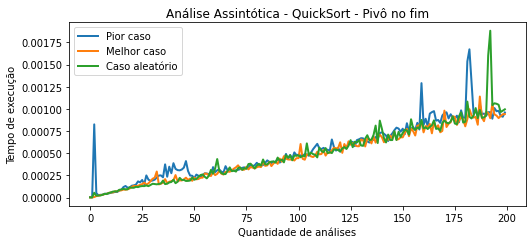

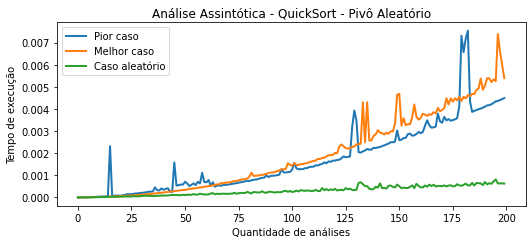

[Comparações (Pivô Aleatório) - Média]: Pior(51) Melhor(51) Aleatório(48)
[Comparações (Pivô no fim) - Média]: Pior(1) Melhor(99) Aleatório(51)


In [52]:
# Melhor caso: vetor já ordenado
melhorCaso = obterArranjoMelhorTempo
# Pior caso: vetor em ordem decrescente
piorCaso = obterArranjoPiorTempo

t1 = "QuickSort - Pivô no fim"
t2 = "QuickSort - Pivô Aleatório"
# Plotagem
p_comp, m_comp, a_comp = resultadoAnalise(quickSortAleatorio, piorCaso, melhorCaso, obterArranjoAleatorio, t1)
p2_comp, m2_comp, a2_comp = resultadoAnalise(quickSortTotal, piorCaso, melhorCaso, obterArranjoAleatorio, t2)
print(f"[Comparações (Pivô Aleatório) - Média]: Pior({p_comp}) Melhor({m_comp}) Aleatório({a_comp})")
print(f"[Comparações (Pivô no fim) - Média]: Pior({p2_comp}) Melhor({m2_comp}) Aleatório({a2_comp})")